# 개별 코드

In [1]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기
from tensorflow.keras import datasets

(X_tn0,y_tn0),(X_te0,y_te0)=datasets.mnist.load_data()

In [3]:
# 원본 데이터 차원 확인
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_te0.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


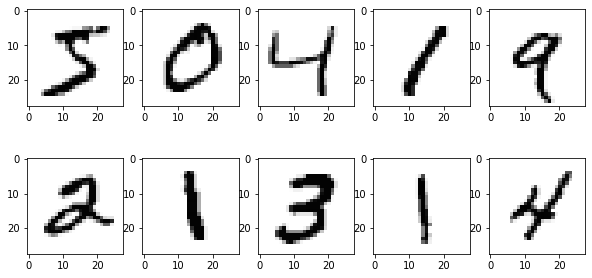

In [4]:
# 원본 데이터 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn0[i].reshape((28, 28)), 
               cmap='Greys')
    
plt.show()

In [5]:
# 타겟 클래스 확인
set(y_tn0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
# 피쳐 데이터 스케일 조정
X_tn_re = X_tn0.reshape(60000, 28, 28, 1)
X_tn = X_tn_re/255
print(X_tn.shape)

X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re/255
print(X_te.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
# 타겟 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical

y_tn = to_categorical(y_tn0)
y_te = to_categorical(y_te0)

In [8]:
# 합성곱 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout

n_class = len(set(y_tn0))

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), 
                 input_shape=(28,28,1), 
                 padding='valid', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3,3), 
                 padding='valid', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

In [9]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [10]:
# 학습
hist = model.fit(X_tn, y_tn, epochs=3, batch_size=100)

Epoch 1/3
600/600 [==============================] - 16s 26ms/step - loss: 0.2281 - accuracy: 0.9288
Epoch 2/3
600/600 [==============================] - 16s 26ms/step - loss: 0.0746 - accuracy: 0.9760
Epoch 3/3
600/600 [==============================] - 16s 27ms/step - loss: 0.0575 - accuracy: 0.9820


In [11]:
# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0263 - accuracy: 0.9919
0.9919499754905701


In [12]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0278 - accuracy: 0.9897
0.9897000193595886


In [13]:
# 예측값 저장
y_pred_hot = model.predict(X_te)
print(y_pred_hot[0])

[1.1695618e-08 2.4671297e-07 2.2221857e-06 1.6682501e-05 7.1951338e-09
 3.8273122e-08 5.8014600e-12 9.9997890e-01 2.0633267e-07 1.6936398e-06]


In [14]:
import numpy as np

y_pred = np.argmax(y_pred_hot, axis=1)
print(y_pred)

[7 2 1 ... 4 5 6]


In [15]:
# 오답 데이터 인덱스 저장
diff = y_te0 - y_pred
diff_idx = []
y_len = len(y_te0)

for i in range(0, y_len):
    if(diff[i]!=0):
        diff_idx.append(i)

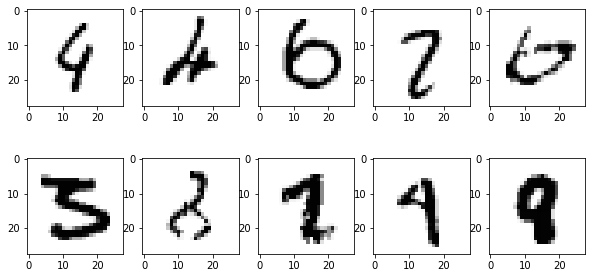

In [16]:
# 오답 데이터 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for i in range(2*5):
    plt.subplot(2, 5, i+1)
    raw_idx = diff_idx[i]
    plt.imshow(X_te0[raw_idx].reshape((28, 28)), 
               cmap='Greys')
    
plt.show()

# 통합 코드

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


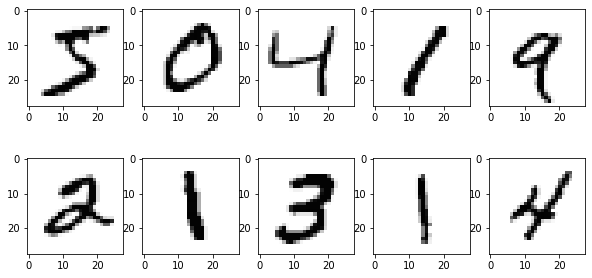

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                   

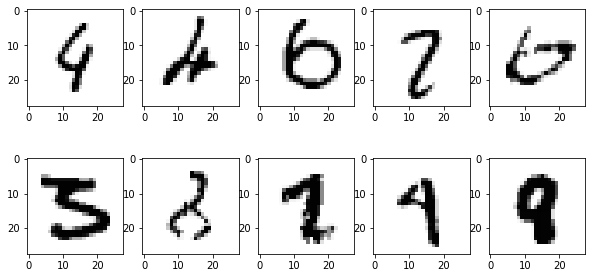

In [17]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout

# 랜덤 시드 설정
np.random.seed(0)
tf.random.set_seed(0)

# 데이터 불러오기
(X_tn0,y_tn0),(X_te0,y_te0)=datasets.mnist.load_data()

# 원본 데이터 차원 확인
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_te0.shape)

# 원본 데이터 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn0[i].reshape((28, 28)), 
               cmap='Greys')
plt.show()

# 타겟 클래스 확인
print(set(y_tn0))

# 피쳐 데이터 스케일 조정
X_tn_re = X_tn0.reshape(60000, 28, 28, 1)
X_tn = X_tn_re/255
print(X_tn.shape)

X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re/255
print(X_te.shape)

# 타겟 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical

y_tn = to_categorical(y_tn0)
y_te = to_categorical(y_te0)

# 합성곱 신경망 생성
n_class = len(set(y_tn0))

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), 
                 input_shape=(28,28,1), 
                 padding='valid', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3,3), 
                 padding='valid', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class, activation='softmax'))
model.summary()

# 모형 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
# 학습
hist = model.fit(X_tn, y_tn, epochs=3, batch_size=100)

# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

# 예측값 저장
y_pred_hot = model.predict(X_te)
y_pred = np.argmax(y_pred_hot, axis=1)

# 오답 데이터 인덱스 저장
diff = y_te0 - y_pred
diff_idx = []
y_len = len(y_te0)

for i in range(0, y_len):
    if(diff[i]!=0):
        diff_idx.append(i)
        
# 오답 데이터 시각화
plt.figure(figsize=(10, 5))

for i in range(2*5):
    plt.subplot(2, 5, i+1)
    raw_idx = diff_idx[i]
    plt.imshow(X_te0[raw_idx].reshape((28, 28)), 
               cmap='Greys')
plt.show()